#### By: Basmala Salama بسملة سلامة

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Importing the data
df = pd.read_csv(r"C:\Users\Tony\Desktop\Computer & Data Science\Summer 2\Traning\Wage.csv")
df

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [3]:
# Checking the shape of the data
df.shape

(3000, 12)

In [4]:
# Checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.4+ KB


In [5]:
# We can convert all data with type "object" to categorical
df['sex'] = df['sex'].astype('category')
df['maritl'] = df['maritl'].astype('category')
df['race'] = df['race'].astype('category')
df['education'] = df['education'].astype('category')
df['region'] = df['region'].astype('category')
df['jobclass'] = df['jobclass'].astype('category')
df['health'] = df['health'].astype('category')
df['health_ins'] = df['health_ins'].astype('category')

In [6]:
# To make sure they are converted successfully
df.dtypes

year             int64
age              int64
sex           category
maritl        category
race          category
education     category
region        category
jobclass      category
health        category
health_ins    category
logwage        float64
wage           float64
dtype: object

In [7]:
# Summary Statistics for Numerical data
df.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


In [8]:
# Summary Statistics for Categorical data
df.describe(exclude = [np.number])

,sex,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,1,5,4,5,1,2,2,2
top,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes
freq,3000,2074,2480,971,3000,1544,2142,2083


In [9]:
# Checking for missing values 
df.isnull().sum() 

year          0
age           0
sex           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

### To check for the presence of outliers


<AxesSubplot:>

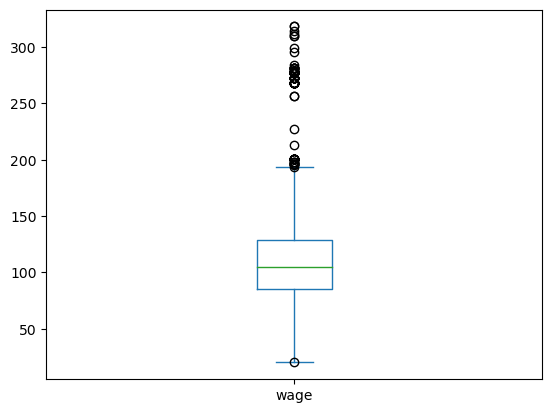

In [10]:
# For wage
df['wage'].plot(kind='box')

<AxesSubplot:>

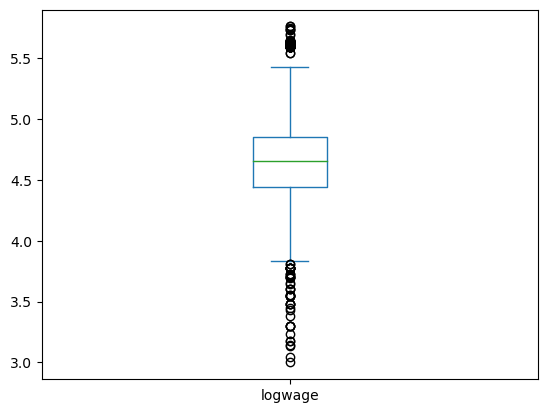

In [11]:
# For logwage
df['logwage'].plot(kind='box')

### SQRT transformation

In [12]:
df['sqrtwage'] = np.sqrt(df['wage'])
df.describe()

,year,age,logwage,wage,sqrtwage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608,10.405839
std,2.026167,11.542406,0.351753,41.728595,1.850206
min,2003.000000,18.000000,3.000000,20.085537,4.481689
25%,2004.000000,33.750000,4.447158,85.383940,9.240343
50%,2006.000000,42.000000,4.653213,104.921507,10.243120
75%,2008.000000,51.000000,4.857332,128.680488,11.343742
max,2009.000000,80.000000,5.763128,318.342430,17.842153


C:\Users\Tony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='logwage', ylabel='Density'>

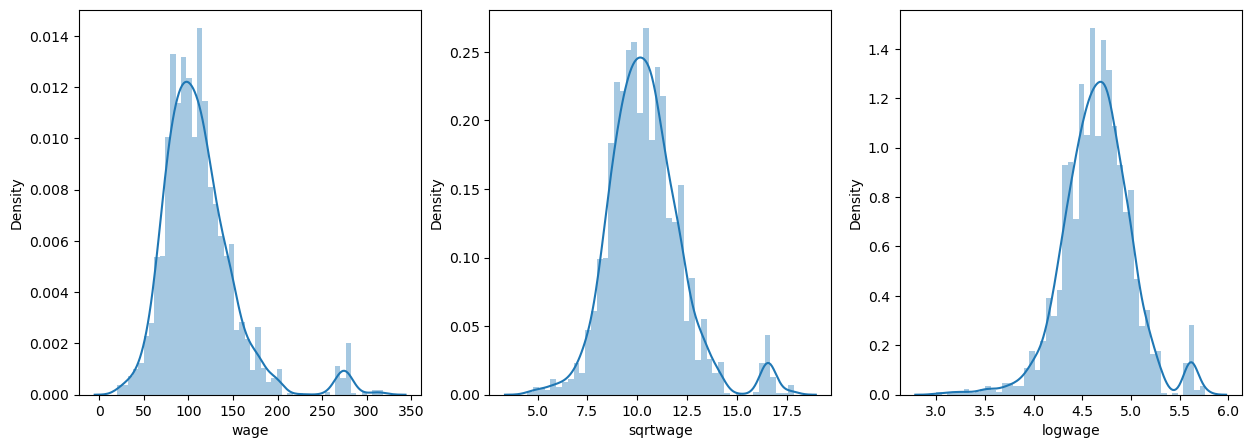

In [13]:
# plotting the distribution
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['wage'], ax=axes[0])
sns.distplot(df['sqrtwage'], ax=axes[1])
sns.distplot(df['logwage'], ax=axes[2])

In [14]:
# Comparing the skewness and kurtosis between the original, SQRT transformed and LOG transformed data
print("The skewness of the original data is {}".format(df.wage.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.sqrtwage.skew()))
print("The skewnss of the LOG transformed data is {}".format(df.logwage.skew()))

print('')


print("The kurtosis of the original data is {}".format(df.wage.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df.sqrtwage.kurt()))
print("The kurtosis of the LOG transformed data is {}".format(df.logwage.kurt()))

The skewness of the original data is 1.6823301828226196
The skewness of the SQRT transformed data is 0.7971907228517634
The skewnss of the LOG transformed data is -0.12361531431706886

The kurtosis of the original data is 4.83901209250617
The kurtosis of the SQRT transformed data is 2.1496453417967074
The kurtosis of the LOG transformed data is 1.7329240573641962


### Insights: LOG transformation seems to be better than SQRT when we comparing the skewness and kurtosis, in this case, LOG transformation is more suitable.


<AxesSubplot:>

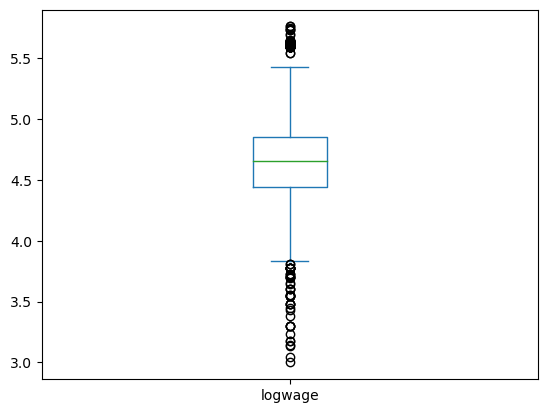

In [15]:
# But we still have outliers
df['logwage'].plot(kind='box')

## Outliers Treatment 

### Z-score

In [16]:
# Creating new variable with Z-score of each record:
df['Z-score'] = stats.zscore(df['wage'])
df.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,sqrtwage,Z-score
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,8.662745,-0.878692
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,8.395000,-0.988158
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,11.444745,0.462076
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,12.437254,1.030201
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,8.662745,-0.878692


In [17]:
# Combined Lower limit and Upper limit then count outliers

df[(df['Z-score']<-3) | (df['Z-score']>3)].shape

(79, 14)

In [18]:
# drop the outliers
df_Z = df[(df['Z-score']>-3) & (df['Z-score']<3)].reset_index()
df_Z.head()

,index,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,sqrtwage,Z-score
0,0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,8.662745,-0.878692
1,1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,8.395000,-0.988158
2,2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,11.444745,0.462076
3,3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,12.437254,1.030201
4,4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,8.662745,-0.878692


In [19]:
# Dimensions after cleaning
df_Z.shape

(2921, 15)

### IQR Method
All the values below (Q1 - 1.5*IQR) and values above (Q3 + 1.5*IQR) are outliers

In [20]:
# Finding the Quantiles

Q1 = df_Z.wage.quantile(0.25)
Q2 = df_Z.wage.quantile(0.50)
Q3 = df_Z.wage.quantile(0.75)

# IQR 
IQR = Q3 - Q1

# Lower Limit
LC = Q1 - (1.5*IQR)

# Upper Limi:
UC = Q3 + (1.5*IQR)

print(LC)
print(UC)

20.45201845719651
191.1139790251765


C:\Users\Tony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


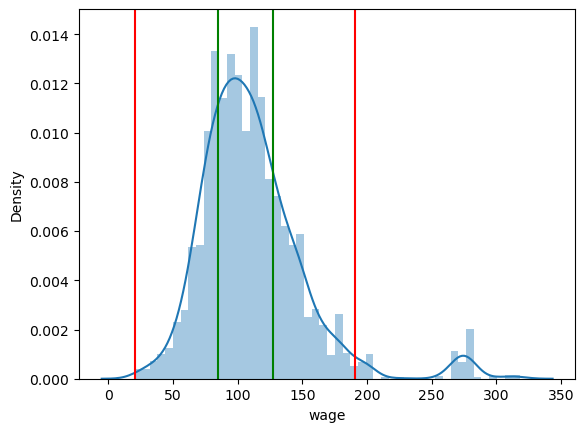

In [21]:
# Plot

sns.distplot(df.wage)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

we can see the outliers obviously

In [22]:
# Count of Outliers
df_Z[(df_Z.wage<LC) | (df_Z.wage>UC)].shape

(37, 15)

In [23]:
# Drop outliers and display the dimensions of cleaned data
df_IQR = df_Z[(df_Z.wage>LC) & (df_Z.wage<UC)]
df_IQR.shape

(2884, 15)

C:\Users\Tony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


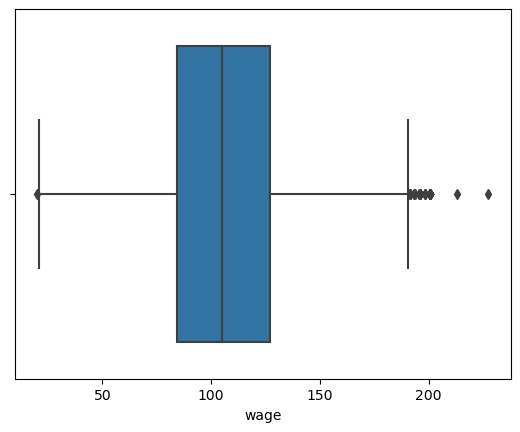

In [24]:
# Cheaking outliers after Z-score method
sns.boxplot(df_Z.wage)
plt.show()

C:\Users\Tony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


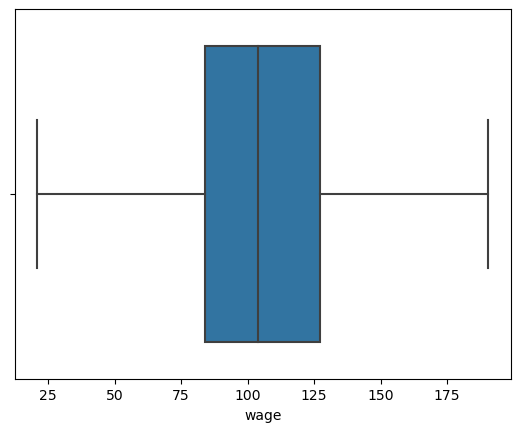

In [25]:
# Cheaking outliers after IQR Method
sns.boxplot(df_IQR.wage)
plt.show()

### We can see that all outliers removed successfully

### Standardization (Z-Score)
Scales the data using the formula (x-mean)/standard deviation

In [26]:
df_IQR.drop(columns = ['Z-score'], inplace=True)
df_IQR.head()

C:\Users\Tony\AppData\Local\Temp\ipykernel_11024\2588555292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IQR.drop(columns = ['Z-score'], inplace=True)


,index,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,sqrtwage
0,0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,8.662745
1,1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,8.395000
2,2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,11.444745
3,3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,12.437254
4,4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,8.662745


In [27]:
# For wage
df_IQR['Z_Score_wage'] = (df_IQR['wage'] - df_IQR['wage'].mean())/df_IQR['wage'].std()
df_IQR.head()

C:\Users\Tony\AppData\Local\Temp\ipykernel_11024\675310617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IQR['Z_Score_wage'] = (df_IQR['wage'] - df_IQR['wage'].mean())/df_IQR['wage'].std()


,index,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,sqrtwage,Z_Score_wage
0,0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,8.662745,-1.022058
1,1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,8.395000,-1.172351
2,2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,11.444745,0.818755
3,3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,12.437254,1.598765
4,4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,8.662745,-1.022058


In [28]:
# For logwage
df_IQR['Z_Score_logwage'] = (df_IQR['logwage'] - df_IQR['logwage'].mean())/df_IQR['logwage'].std()
df_IQR.head()

C:\Users\Tony\AppData\Local\Temp\ipykernel_11024\2473644690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IQR['Z_Score_logwage'] = (df_IQR['logwage'] - df_IQR['logwage'].mean())/df_IQR['logwage'].std()


,index,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,sqrtwage,Z_Score_wage,Z_Score_logwage
0,0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,8.662745,-1.022058,-0.976230
1,1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,8.395000,-1.172351,-1.179318
2,2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,11.444745,0.818755,0.825302
3,3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,12.437254,1.598765,1.363277
4,4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,8.662745,-1.022058,-0.976230


In [29]:
# For age
df_IQR['Z_Score_age'] = (df_IQR['age'] - df_IQR['age'].mean())/df_IQR['age'].std()
df_IQR.head()

C:\Users\Tony\AppData\Local\Temp\ipykernel_11024\2190060774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IQR['Z_Score_age'] = (df_IQR['age'] - df_IQR['age'].mean())/df_IQR['age'].std()


,index,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,sqrtwage,Z_Score_wage,Z_Score_logwage,Z_Score_age
0,0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,8.662745,-1.022058,-0.976230,-2.090422
1,1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,8.395000,-1.172351,-1.179318,-1.573433
2,2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,11.444745,0.818755,0.825302,0.236027
3,3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,12.437254,1.598765,1.363277,0.063697
4,4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,8.662745,-1.022058,-0.976230,0.666851


C:\Users\Tony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

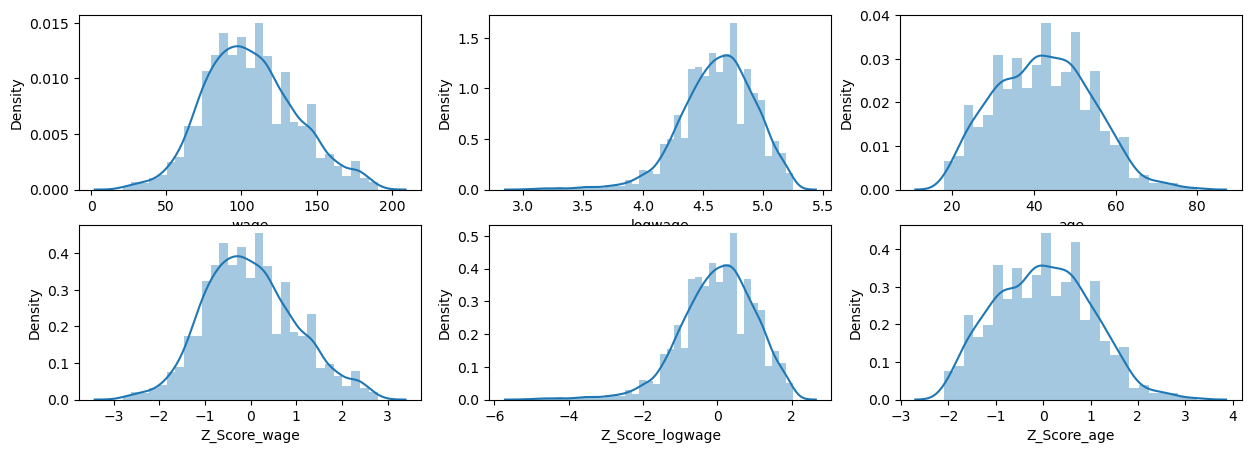

In [30]:
# Comparing the distribution of the columns

fig, axes = plt.subplots(2,3, figsize=(15,5))

sns.distplot(df_IQR['wage'], ax=axes[0,0])
sns.distplot(df_IQR['Z_Score_wage'], ax=axes[1,0])
sns.distplot(df_IQR['logwage'], ax=axes[0,1])
sns.distplot(df_IQR['Z_Score_logwage'], ax=axes[1,1])
sns.distplot(df_IQR['age'], ax=axes[0,2])
sns.distplot(df_IQR['Z_Score_age'], ax=axes[1,2])


plt.show()

### Normalization: Min Max Scalar
Scales the data using the formula (x - min)/(max - min)

In [31]:
df_IQR['Min_Max_wage'] = (df_IQR['wage'] - df_IQR['wage'].min())/ (df_IQR['wage'].max() - df_IQR['wage'].min())
df_IQR['Min_Max_log'] = (df_IQR['logwage'] - df_IQR['logwage'].min())/ (df_IQR['logwage'].max() - df_IQR['logwage'].min())
df_IQR['Min_Max_age'] = (df_IQR['age'] - df_IQR['age'].min())/ (df_IQR['age'].max() - df_IQR['age'].min())
df_IQR.head()

C:\Users\Tony\AppData\Local\Temp\ipykernel_11024\3417508452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IQR['Min_Max_wage'] = (df_IQR['wage'] - df_IQR['wage'].min())/ (df_IQR['wage'].max() - df_IQR['wage'].min())
C:\Users\Tony\AppData\Local\Temp\ipykernel_11024\3417508452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IQR['Min_Max_log'] = (df_IQR['logwage'] - df_IQR['logwage'].min())/ (df_IQR['logwage'].max() - df_IQR['logwage'].min())
C:\Users\Tony\AppData\Local\Temp\ipykernel_11024\3417

,index,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,sqrtwage,Z_Score_wage,Z_Score_logwage,Z_Score_age,Min_Max_wage,Min_Max_log,Min_Max_age
0,0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,8.662745,-1.022058,-0.976230,-2.090422,0.319013,0.578069,0.000000
1,1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,8.395000,-1.172351,-1.179318,-1.573433,0.292086,0.549638,0.096774
2,2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,11.444745,0.818755,0.825302,0.236027,0.648816,0.830274,0.435484
3,3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,12.437254,1.598765,1.363277,0.063697,0.788564,0.905588,0.403226
4,4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,8.662745,-1.022058,-0.976230,0.666851,0.319013,0.578069,0.516129


C:\Users\Tony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

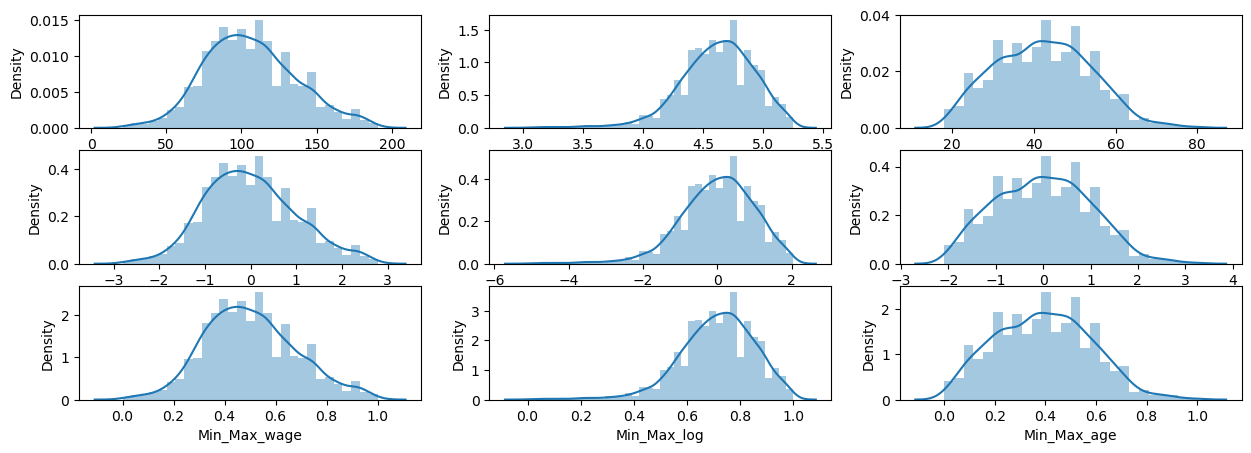

In [32]:
# Comparing the distribution of the columns

fig, axes = plt.subplots(3,3, figsize=(15,5))

sns.distplot(df_IQR['wage'], ax=axes[0,0])
sns.distplot(df_IQR['Z_Score_wage'], ax=axes[1,0])
sns.distplot(df_IQR['Min_Max_wage'], ax=axes[2,0])
sns.distplot(df_IQR['logwage'], ax=axes[0,1])
sns.distplot(df_IQR['Z_Score_logwage'], ax=axes[1,1])
sns.distplot(df_IQR['Min_Max_log'], ax=axes[2,1])
sns.distplot(df_IQR['age'], ax=axes[0,2])
sns.distplot(df_IQR['Z_Score_age'], ax=axes[1,2])
sns.distplot(df_IQR['Min_Max_age'], ax=axes[2,2])

plt.show()

In [33]:
# Comparing the skewness and kurtosis 

# For wage:
print('For wage')
print("The skewness for the original data is {}.".format(df_IQR.wage.skew()))
print("The kurtosis for the original data is {}.".format(df_IQR.wage.kurt()))
print("The skewness for the Zscore Scaled column is {}.".format(df_IQR.Z_Score_wage.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df_IQR.Z_Score_wage.kurt()))
print("The skewness for the Min Max Scaled Data is {}.".format(df_IQR.Min_Max_wage.skew()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(df_IQR.Min_Max_wage.kurt()))
print('')

# For logwage:
print('For logwage')
print("The skewness for the original data is {}.".format(df_IQR.logwage.skew()))
print("The kurtosis for the original data is {}.".format(df_IQR.logwage.kurt()))
print("The skewness for the Zscore Scaled column is {}.".format(df_IQR.Z_Score_logwage.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df_IQR.Z_Score_logwage.kurt()))
print("The skewness for the Min Max Scaled Data is {}.".format(df_IQR.Min_Max_log.skew()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(df_IQR.Min_Max_log.kurt()))
print('')

# For age:
print('For age')
print("The skewness for the original data is {}.".format(df_IQR.age.skew()))
print("The kurtosis for the original data is {}.".format(df_IQR.age.kurt()))
print("The skewness for the Zscore Scaled column is {}.".format(df_IQR.Z_Score_age.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df_IQR.Z_Score_age.kurt()))
print("The skewness for the Min Max Scaled Data is {}.".format(df_IQR.Min_Max_age.skew()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(df_IQR.Min_Max_age.kurt()))

For wage
The skewness for the original data is 0.2655323145861291.
The kurtosis for the original data is -0.15186263663219224.
The skewness for the Zscore Scaled column is 0.26553231458613036.
The kurtosis for the Zscore Scaled columns is -0.1518626366321909.
The skewness for the Min Max Scaled Data is 0.26553231458612964.
The kurtosis for the Min Max Scaled Data is -0.15186263663219135.

For logwage
The skewness for the original data is -0.7707227783085377.
The kurtosis for the original data is 1.6166110301212733.
The skewness for the Zscore Scaled column is -0.7707227783085286.
The kurtosis for the Zscore Scaled columns is 1.6166110301212635.
The skewness for the Min Max Scaled Data is -0.7707227783085306.
The kurtosis for the Min Max Scaled Data is 1.6166110301212644.

For age
The skewness for the original data is 0.16233933362896247.
The kurtosis for the original data is -0.4467500861805136.
The skewness for the Zscore Scaled column is 0.16233933362896194.
The kurtosis for the Zsco

#### Insights: Skewness, Kurtosis and Distribution does not change , only  the range on the x-axis is different.

## Encoding the Categorical Features

In [34]:
df_encode = df_IQR.drop(columns = ["Z_Score_wage", "Z_Score_logwage", "Z_Score_age", "Min_Max_wage", "Min_Max_log", "Min_Max_age"])
df_encode.head()

,index,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,sqrtwage
0,0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,8.662745
1,1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,8.395000
2,2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,11.444745
3,3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,12.437254
4,4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,8.662745


### pd.get_dummies

In [35]:
dummy_maritl = pd.get_dummies(df_encode['maritl'])
dummy_maritl

,1. Never Married,2. Married,3. Widowed,4. Divorced,5. Separated
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
2916,0,1,0,0,0
2917,0,1,0,0,0
2918,0,1,0,0,0
2919,1,0,0,0,0


### Label Encoding

In [36]:
# Add column in the data contain the "race" col after Encoding
LE = LabelEncoder()
df_encode['LE_race'] = LE.fit_transform(df_encode[['race']])
df_encode.head()

C:\Users\Tony\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,index,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,sqrtwage,LE_race
0,0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,8.662745,0
1,1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,8.395000,0
2,2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,11.444745,0
3,3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293,12.437254,2
4,4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154,8.662745,0


In [37]:
# Encoding all Categorical Features
df_encode['LE_maritl'] = LE.fit_transform(df_encode[['maritl']])
df_encode['LE_sex'] = LE.fit_transform(df_encode[['sex']])
df_encode['LE_education'] = LE.fit_transform(df_encode[['education']])
df_encode['LE_region'] = LE.fit_transform(df_encode[['region']])
df_encode['LE_jobclass'] = LE.fit_transform(df_encode[['jobclass']])
df_encode['LE_health'] = LE.fit_transform(df_encode[['health']])
df_encode['LE_health_ins'] = LE.fit_transform(df_encode[['health_ins']])
df_encode.head()

C:\Users\Tony\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tony\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tony\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tony\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

,index,year,age,sex,maritl,race,education,region,jobclass,health,...,wage,sqrtwage,LE_race,LE_maritl,LE_sex,LE_education,LE_region,LE_jobclass,LE_health,LE_health_ins
0,0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,...,75.043154,8.662745,0,0,0,0,0,0,0,1
1,1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,...,70.476020,8.395000,0,0,0,3,0,1,1,1
2,2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,...,130.982177,11.444745,0,1,0,2,0,0,0,0
3,3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,...,154.685293,12.437254,2,1,0,3,0,1,1,0
4,4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,...,75.043154,8.662745,0,3,0,1,0,1,0,0


In [38]:
df_encode['LE_sex'].value_counts()

0    2884
Name: LE_sex, dtype: int64

They are all Males

In [39]:
df_encode['LE_region'].value_counts()

0    2884
Name: LE_region, dtype: int64

 Data collected from one region

### Training and Testing data
Trying to predict the wage

In [40]:
# Drop unimportant columns
df_wages = df_IQR.drop(columns = ["Z_Score_wage", "Z_Score_logwage", "Z_Score_age", "Min_Max_wage", "Min_Max_log", "Min_Max_age", "sqrtwage", "logwage", "sex", "region"])
df_wages.set_index("index", inplace = True)
df_wages

,year,age,maritl,race,education,jobclass,health,health_ins,wage
index,,,,,,,,,
0,2006,18,1. Never Married,1. White,1. < HS Grad,1. Industrial,1. <=Good,2. No,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Information,2. >=Very Good,2. No,70.476020
2,2003,45,2. Married,1. White,3. Some College,1. Industrial,1. <=Good,1. Yes,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Information,2. >=Very Good,1. Yes,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Information,1. <=Good,1. Yes,75.043154
...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,1. Industrial,2. >=Very Good,1. Yes,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,1. Industrial,2. >=Very Good,2. No,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,1. Industrial,1. <=Good,2. No,66.229408


In [41]:
# Splitting for X and Y variables
Y = df_wages['wage']
X = df_wages.drop(['wage'], axis=1)

In [42]:
# Independent Variable
X.head()

,year,age,maritl,race,education,jobclass,health,health_ins
index,,,,,,,,
0,2006,18,1. Never Married,1. White,1. < HS Grad,1. Industrial,1. <=Good,2. No
1,2004,24,1. Never Married,1. White,4. College Grad,2. Information,2. >=Very Good,2. No
2,2003,45,2. Married,1. White,3. Some College,1. Industrial,1. <=Good,1. Yes
3,2003,43,2. Married,3. Asian,4. College Grad,2. Information,2. >=Very Good,1. Yes
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Information,1. <=Good,1. Yes


In [43]:
# Dependent or Target Variable
Y.head()

index
0     75.043154
1     70.476020
2    130.982177
3    154.685293
4     75.043154
Name: wage, dtype: float64

In [44]:
# Splitting dataset into 70% Training and 30% Testing Data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.7, random_state = 0)

# Check the dimensions of the train & test subsets

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (2018, 8)
The shape of X_test is: (866, 8)

The shape of Y_train is: (2018,)
The shape of Y_test is: (866,)


#### By: Basmala Salama بسملة سلامة